__Digit Recognizer__<br>
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. <br>
This pixel-value is an integer between 0 and 255, inclusive.higher no. means darker<br>


In [1]:
import numpy as np       # linear algebra
import pandas as pd      # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
#Reading 1st input file
train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


train.csv: training set containing the label and the 784 pixel values (28x28 images), between 0-255

In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
#NaN values in the dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


No missing value. but still we can check using another methos.

In [6]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

(False which means it has no missing values)<br>

In [7]:
# Extract features
features = train.drop('label', axis=1)

# Extract label
y_train = train['label']
y_train.value_counts()
# Train images
X_ = np.array(features)
X_train = X_.reshape(X_.shape[0], 28, 28)
print("Number of train images = {} in Insurance data frame".format(X_train.shape))

Number of train images = (42000, 28, 28) in Insurance data frame


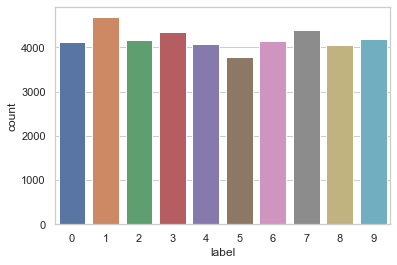

In [8]:
# Let's build a count plot to see the count of all the labels.
sns.countplot(y_train);

IMAGE LABEL: 3


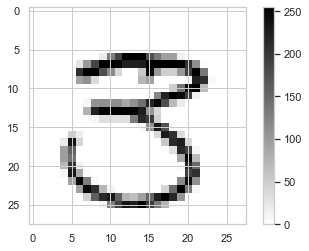

In [9]:
# Visualize single digit .
digit_array = train.loc[7, "pixel0":]
arr = np.array(digit_array) 

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(train.loc[7, "label"]))

In [10]:
#Displays 4 handwritten digit images
def display_digits(N):
    """Picks-up randomly N images within the 
    train dataset between 0 and 41999 and displays the images
    with 4 images/row"""
    
    images = np.random.randint(low=0, high=42001, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//4)+1, 4, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

    return ""

Handwritten picked-up digits:  [8 8 5 8 5 5 3 3 8 2 0 9]


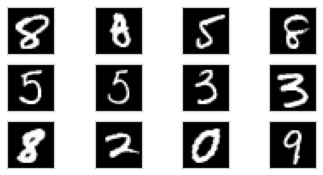

''

In [11]:
display_digits(12)

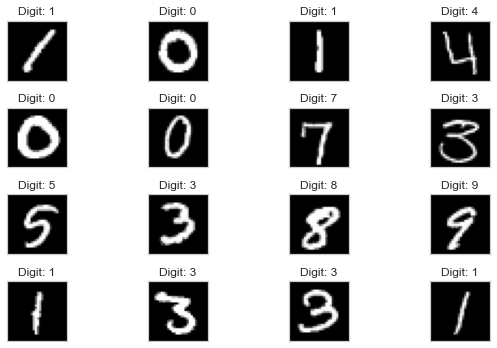

In [12]:
fig = plt.figure(figsize=(10,5))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    
    plt.imshow(X_train[i], cmap='gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title('Digit: ' + str(y_train[i]))

<AxesSubplot:xlabel='label', ylabel='Density'>

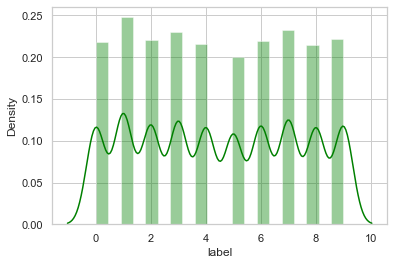

In [13]:
#Displot – Similar to histogram in the graphical, but with additional features. And bringing Kernel Density Estimation (KDE).
sns.distplot(train['label'], kde = True, color ='green', bins = 20)

In [14]:
label_counts=train.groupby('label').apply(lambda x:x['label'].count()).reset_index(name='Counts')
count=label_counts.sort_values(by='Counts',ascending=False)
print(count)


   label  Counts
1      1    4684
7      7    4401
3      3    4351
9      9    4188
2      2    4177
6      6    4137
0      0    4132
4      4    4072
8      8    4063
5      5    3795


Text(0.5, 1.0, 'All digit ')

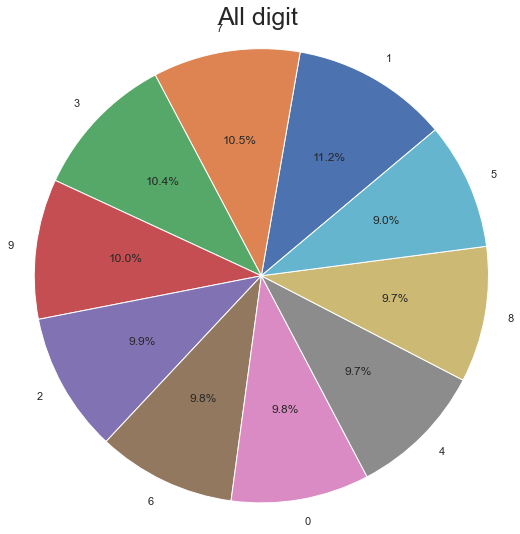

In [15]:
plt.figure(figsize=(9,9))
plt.pie(count['Counts'],labels=count['label'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('All digit ',size = 25)